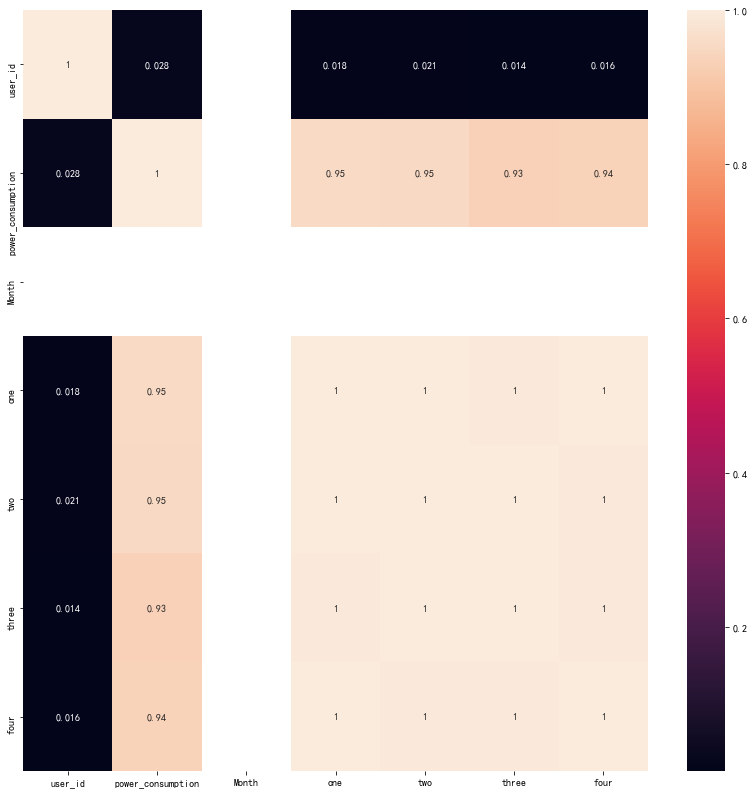

[ 1  4  2 ... 19 19 19]
169809.73763320665


In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
 
# 数据加载，避免中文乱码问题
inputfile = 'D:/Desktop/任务5/用户用电季度分析/outfile/jidu-out.xlsx'
outfile = 'D:/Desktop/任务5/用户用电季度分析/outfile/jidu-out(2).xlsx'
data_ori = pd.read_csv(inputfile, encoding = 'gb18030')
features = [u'user_id',u'record_date',u'power_consumption',u'Month',u'one',u'two',u'three',u'four',u'label']
data = data_ori[features]
 
# 对英雄属性之间的关系进行可视化分析
# 设置plt正确显示中文
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
# 用热力图呈现features_mean字段之间的相关性
corr = data[features].corr()
plt.figure(figsize=(14,14))
# annot=True显示每个方格的数据
sns.heatmap(corr, annot=True)
plt.show()
 
# 相关性大的属性保留一个，因此可以对属性进行降维
features_remain = [u'Month',u'one',u'two',u'three',u'four']
data = data_ori[features_remain]

# 采用Z-Score规范化数据，保证每个特征维度的数据均值为0，方差为1
ss = StandardScaler()
data = ss.fit_transform(data)
# 构造GMM聚类
gmm = GaussianMixture(n_components=20, covariance_type='full')
gmm.fit(data)
#gmm.fit(features_remain)
# 训练数据
prediction = gmm.predict(data)
print(prediction)
# 将分组结果输出到CSV文件中
data_ori.insert(0, 'label1', prediction)
data_ori.to_csv(outfile, index=False, sep=',')

#聚类结果的评估
from sklearn.metrics import calinski_harabasz_score
print(calinski_harabasz_score(data, prediction))

In [2]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
 
#

gmm = GaussianMixture(n_components=20, covariance_type='full')
gmm.fit(data)

print("轮廓系数：", metrics.silhouette_score(data, prediction, metric='euclidean'))

轮廓系数： 0.39586289541326336
